In [ ]:
# DSC 540
# Weeks 9 & 10 
# Summer 2024
# Term Project Milestone 5
# Created By Matthew Heinen
# 8/7/24

# Weather and Carlos Santana’s Effectiveness
## DSC 540: Milestone 5

# Load Datasets into SQL Database

Here we will take all 3 tables that we have created in previous milestones, flat file, web scraped and API data, and write or load them into a database. As a reminder the 3 tables are as follows: 

Flat File: Baseball Savant data from all balls put in play across Carlos Santana's 17 year MLB career. 
Web Scraped: Data from Steamheads about MLB ballpark latitude, longitude and altitude. 
API: Historical weather data recorded from the location and time of the games Santana played in. 


In [33]:
# Import Packages. 
import pandas as pd
import sqlite3

# Read the CSV file into a DataFrame
bip = pd.read_csv('carlos_balls_in_play.csv')
weather = pd.read_csv('carlos_weather_from_api_no_duplicates.csv')
ballparks = pd.read_csv('ballpark_data_web.csv')
ab_key = pd.read_csv('ab_key.csv')


# Connect to the SQLite database named carlos.db
conn = sqlite3.connect('carlos.db')

# Write the DataFrame to a SQL database
bip.to_sql('carlos_balls_in_play', conn, if_exists='replace', index=False)
weather.to_sql('weather', conn, if_exists='replace', index=False)
ballparks.to_sql('ballparks', conn, if_exists='replace', index=False)
ab_key.to_sql('ab_key', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [10]:
# Establish connection 
# We have to re establish connection after the connection was closed above. 
conn = sqlite3.connect("carlos.db")  

# Define the cursor as c, This will be used to execute SQL commands and queries. 
c = conn.cursor()

In [16]:
# write SQL statemtnt to query the count of people from the persons table 
# grouped by age

query = "SELECT * FROM carlos_balls_in_play"

# Execute 
c.execute(query)
#use fetchall to loop through and print every row returned from the query. 
for row in c.fetchall():
    print(row)

# Close the connection 
conn.close()

('SI', '2018-06-19', 101.2, -1.43, 6.18, 'Hicks, Jordan', 663855, 'field_out', 1, 'Carlos Santana grounds out, shortstop Yairo Munoz to first baseman Matt Carpenter.', 'R', 'L', 'R', 'PHI', 'STL', 6.0, 'ground_ball', 0, 0, -1.24, 0.57, -0.54, 3.3, 0, 0, 0, 0, 9, 'Bot', 7.0, 97.5, -25.0, 101.4, 1933.0, 6.3, 530501, 54.19, 0.153, 0.132, 0, 0, 2.0, 79, 1, 'Sinker', 6, 7, 6, 7, 7, 6, 6, 7, 'Standard', 'Standard', 245.0, -0.086, -0.232, 1529452800)
('FF', '2015-05-24', 100.9, 0.84, 6.34, 'Chapman, Aroldis', 547973, 'single', 7, 'Carlos Santana singles on a ground ball to center fielder Brennan Boesch.   Jason Kipnis scores.', 'R', 'R', 'L', 'CLE', 'CIN', 8.0, 'ground_ball', 1, 0, 1.0, 1.54, -0.3, 1.95, 0, 1, 0, 1, 8, 'Bot', 22.0, 101.5, -5.0, 101.1, 2488.0, 6.6, 414302, 54.5, 0.347, 0.296, 1, 0, 2.0, 68, 2, '4-Seam Fastball', 4, 1, 4, 1, 1, 5, 5, 1, 'Standard', 'Standard', None, 0.012, 0.578, 1432512000)
('SI', '2019-05-26', 100.5, 0.86, 6.66, 'Alvarado, José', 621237, 'force_out', 9, 'Carl

In [27]:
import pandas as pd
from sqlalchemy import create_engine

# Create a connection to the SQLite database
engine = create_engine('sqlite:///carlos.db')

# Read the table from the SQLite database into a pandas DataFrames to view them. 
weather = pd.read_sql_table('weather', con=engine)
bip = pd.read_sql_table('carlos_balls_in_play', con=engine)

In [29]:
weather.head()
bip.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,unix_time
0,SI,2018-06-19,101.2,-1.43,6.18,"Hicks, Jordan",663855,field_out,1,"Carlos Santana grounds out, shortstop Yairo Mu...",...,7,6,6,7,Standard,Standard,245.0,-0.086,-0.232,1529452800
1,FF,2015-05-24,100.9,0.84,6.34,"Chapman, Aroldis",547973,single,7,Carlos Santana singles on a ground ball to cen...,...,1,5,5,1,Standard,Standard,NaN,0.012,0.578,1432512000
2,SI,2019-05-26,100.5,0.86,6.66,"Alvarado, José",621237,force_out,9,"Carlos Santana grounds into a force out, field...",...,6,3,3,6,Standard,Standard,143.0,-0.040,-0.459,1558915200
3,FF,2023-06-03,100.2,-1.47,6.24,"Hicks, Jordan",663855,single,2,Carlos Santana singles on a fly ball to left f...,...,1,4,4,1,Strategic,Standard,210.0,0.064,0.748,1685836800
4,FF,2019-09-14,100.1,-1.55,6.44,"Graterol, Brusdar",660813,field_out,12,"Carlos Santana grounds out, shortstop Jorge Po...",...,4,5,5,4,Infield shift,Standard,205.0,-0.018,-0.286,1568505600


# Join Tables From Database Into 1 Dataframe

Here we will join all of the tables in our database into one DataFrame to perform our analysis. 

In [41]:
# Write SQL query to join all tables into one for the purpose of making one large data set. 
# Join bip to ab_key (on abbreviation) 
# Join ab_key to ballparks (on lat and lon)
# Join ballparks to weather (on lat, lon and unix time (from bip))
# All should be inner joins. 

query = ''' 
SELECT *
FROM carlos_balls_in_play
INNER JOIN ab_key ON carlos_balls_in_play.home_team = ab_key.abreviation
INNER JOIN ballparks ON ab_key.team_name = ballparks.Team
INNER JOIN weather ON ballparks.lat = weather.lat AND ballparks.long = weather.lon AND carlos_balls_in_play.unix_time = weather.datetime;
'''

In [55]:
# Import packages. 
import sqlite3
import pandas as pd

# Establish connection 
# We have to re establish connection after the connection was closed above. 
conn = sqlite3.connect("carlos.db")  

# Read the results of the SQL query into carlos_data DataFrame. 
carlos_data = pd.read_sql_query(query , conn)

# Close the connection
conn.close()

In [63]:
# Verify that the DataFrame has read in properly. 
carlos_data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,pitcher_name,pitcher_id,ab_result,pitch_zone_location,description,...,temp,feels_like,pressure_hPa,humidity,dew_point,cloud_cover,wind_deg,weather_type,description,pressure_atm
0,SI,2018-06-19,101.2,-1.43,6.18,"Hicks, Jordan",663855,field_out,1,"Carlos Santana grounds out, shortstop Yairo Mu...",...,82.562,81.698,1009,38,54.410,40,10,Clouds,scattered clouds,0.995806
1,FF,2015-05-24,100.9,0.84,6.34,"Chapman, Aroldis",547973,single,7,Carlos Santana singles on a ground ball to cen...,...,77.810,76.658,1021,29,43.052,100,130,Clouds,overcast clouds,1.007649
2,SI,2019-05-26,100.5,0.86,6.66,"Alvarado, José",621237,force_out,9,"Carlos Santana grounds into a force out, field...",...,60.458,60.476,1017,91,57.812,100,20,Mist,mist,1.003701
3,FF,2023-06-03,100.2,-1.47,6.24,"Hicks, Jordan",663855,single,2,Carlos Santana singles on a fly ball to left f...,...,79.070,79.070,1013,73,69.674,75,80,Clouds,broken clouds,0.999753
4,FF,2019-09-14,100.1,-1.55,6.44,"Graterol, Brusdar",660813,field_out,12,"Carlos Santana grounds out, shortstop Jorge Po...",...,69.404,69.296,1022,69,58.802,0,270,Clear,clear sky,1.008636


In [67]:
# Verify the shape of the DataFrame. 
carlos_data.shape


(1942, 82)

In [71]:
# Print all the column names in carlos_data. 
# This will both help us verify and refresh our memory of whats in the DataFrame. 
print(carlos_data.columns)

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'pitcher_name', 'pitcher_id', 'ab_result',
       'pitch_zone_location', 'description', 'game_type', 'batter_stance',
       'p_throws', 'home_team', 'away_team', 'hit_location', 'bb_type',
       'balls', 'strikes', 'pitch_hor_break', 'pitch_ver_break', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_id',
       'release_pos_y', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'babip_value', 'iso_value',
       'contact_type', 'at_bat_number', 'pitch_number', 'pitch_name',
       'home_score', 'away_score', 'bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score',
       'if_fielding_alignment', 'of_fielding_alignment', 'spin_axis',
       '

Here we can see that all of our data appears to have read in properly and completely. We can now begin our analysis. 

# Create 5 Visualizations That Demonstrate the Data. 

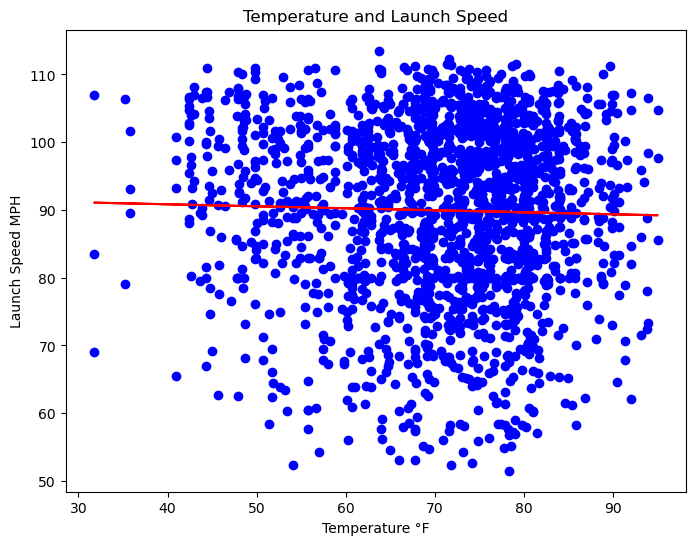

In [75]:
# Build Scatter plot showing the relationship between temperature and launch speed. 

# Import necessary packages. 
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(carlos_data['temp'], carlos_data['launch_speed'], color='b', marker='o')

# Use numpy to add a trendline
# Define coefficients
coefficients = np.polyfit(carlos_data['temp'], carlos_data['launch_speed'], 1)
# Define Trendline
trendline = np.poly1d(coefficients)
# plot Trendline
plt.plot(carlos_data['temp'], trendline(carlos_data['temp']), color='r', label='Trendline')
# Add labels and title
plt.title('Temperature and Launch Speed')
plt.xlabel('Temperature °F')
plt.ylabel('Launch Speed MPH')

# Display the plot
plt.show()

In [89]:
# Lets now define this trend line and as a linear regression model to evaluate the effects of temp on launch speed. 

# Import packages
import statsmodels.formula.api as smf

# build model
model = smf.ols('launch_speed ~ temp', data=carlos_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           launch_speed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.251
Date:                Sat, 10 Aug 2024   Prob (F-statistic):              0.263
Time:                        09:56:47   Log-Likelihood:                -7726.5
No. Observations:                1942   AIC:                         1.546e+04
Df Residuals:                    1940   BIC:                         1.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.0075      1.887     48.769      0.000      88.308      95.707
temp          -0.0295      0.026     -1.119      0.263      -0.081       0.022
==============================================================================
Omnibus:                      104.176   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.057
Skew:                          -0.577   Prob(JB):                     1.04e-25
Kurtosis:                       2.697   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see above temperature does not appear to have muck of an effect on Santana's launch speed. Although there is a negative trend suggesting increasing temperatures decrease launch speed, the results are not significant. 

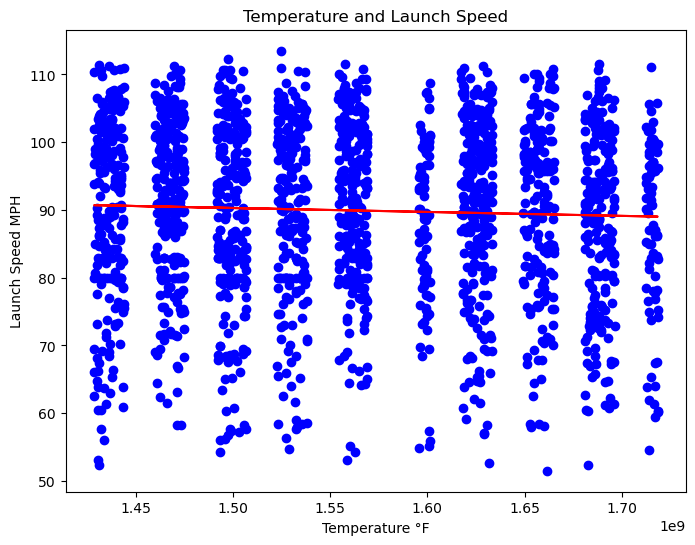

In [100]:

# Import necessary packages. 
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(carlos_data['unix_time'], carlos_data['launch_speed'], color='b', marker='o')

# Use numpy to add a trendline
# Define coefficients
coefficients = np.polyfit(carlos_data['unix_time'], carlos_data['launch_speed'], 1)
# Define Trendline
trendline = np.poly1d(coefficients)
# plot Trendline
plt.plot(carlos_data['unix_time'], trendline(carlos_data['unix_time']), color='r', label='Trendline')
# Add labels and title
plt.title('Temperature and Launch Speed')
plt.xlabel('Temperature °F')
plt.ylabel('Launch Speed MPH')

# Display the plot
plt.show()

In [79]:
# Build a bar graph to show estimated_ba_uning_speedangle for each weather type. 

# Use Group by to calculate average estimated ba by weather. 
est_ba_by_weather = carlos_data.groupby('weather_type')['estimated_ba_using_speedangle'].mean()

print(est_ba_by_weather)

weather_type
Clear           0.311124
Clouds          0.319091
Haze            0.302318
Mist            0.436450
Rain            0.319975
Smoke           0.388077
Thunderstorm    0.300484
Name: estimated_ba_using_speedangle, dtype: float64


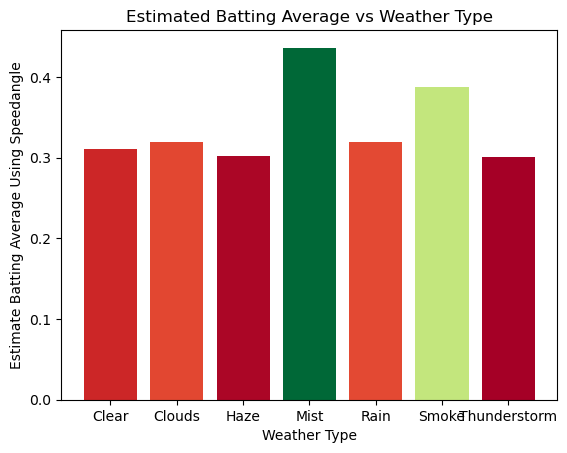

In [85]:
# Build a bar graph to show estimated_ba_uning_speedangle for each weather type. 

# create normalized values for ba
normalized_values = (est_ba_by_weather - est_ba_by_weather.min()) / (est_ba_by_weather.max() - est_ba_by_weather.min())

# create the color scale for conditional formatting 
colors = plt.cm.RdYlGn(normalized_values)  # Use RdYlGn colormap

# Create plot
plt.bar(est_ba_by_weather.index, est_ba_by_weather.values, color= colors)

# Add labels and title
plt.xlabel('Weather Type')
plt.ylabel('Estimate Batting Average Using Speedangle')
plt.title('Estimated Batting Average vs Weather Type')

# Display the graph
plt.show()

In [95]:
# Perform an ANOVA test to see the significance of the results. 

# Import packages. 
import pandas as pd
from scipy.stats import f_oneway

# Perform ANOVA test
grouped_data = [carlos_data[carlos_data['weather_type'] == category]['estimated_ba_using_speedangle'] for category in df['weather_type'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.7578792617405989
P-value: 0.6031269115369913


Here we can see that although Santana appears to perform better in mist ad smoke compared to other weather conditions there is no statistical difference in his performance. 

Text(0.5, 1.0, 'Hit Distribution Given Weather Conditions')

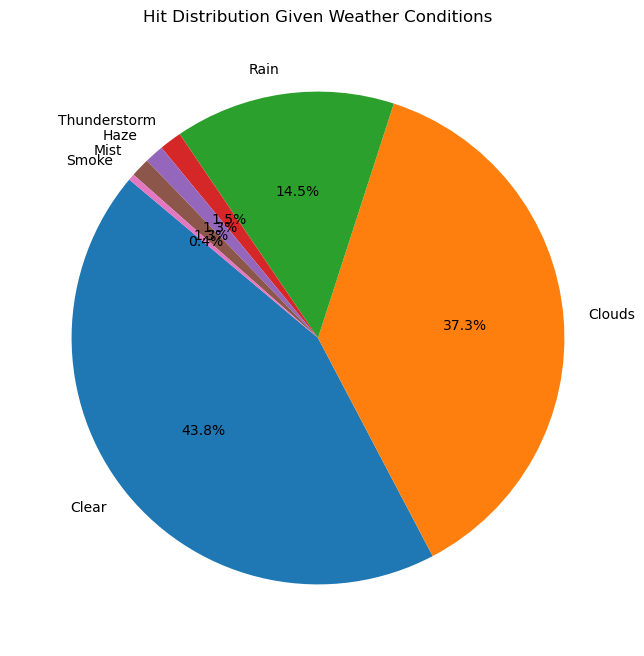

In [148]:
# Create a pie chart showing the percentage of Santana's hits in each weather condition. 

# Calculate the weather value counts for hits. 
weather_counts = carlos_hits['weather_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hit Distribution Given Weather Conditions')

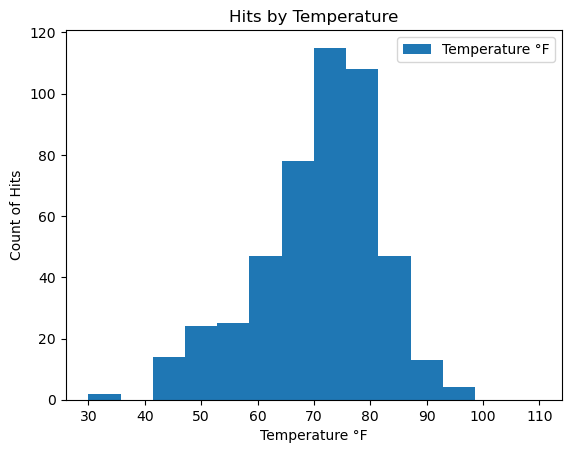

In [110]:
# Build a histogram to show Santanas career hit dispersion across different temperatures. 

# Filter the carlos_data DataFrame to only include hits. 
carlos_hits = carlos_data[carlos_data['babip_value'] == 1]

# Import Packages
import numpy as np
import matplotlib.pyplot as plt


x = carlos_hits.temp
# Use 15 bins.
bins = np.linspace(30, 110, 15)

plt.hist([x], bins, label=['Temperature °F'])
plt.legend(loc='upper right')
plt.xlabel("Temperature °F")
plt.ylabel("Count of Hits")
plt.title("Hits by Temperature")
plt.show()

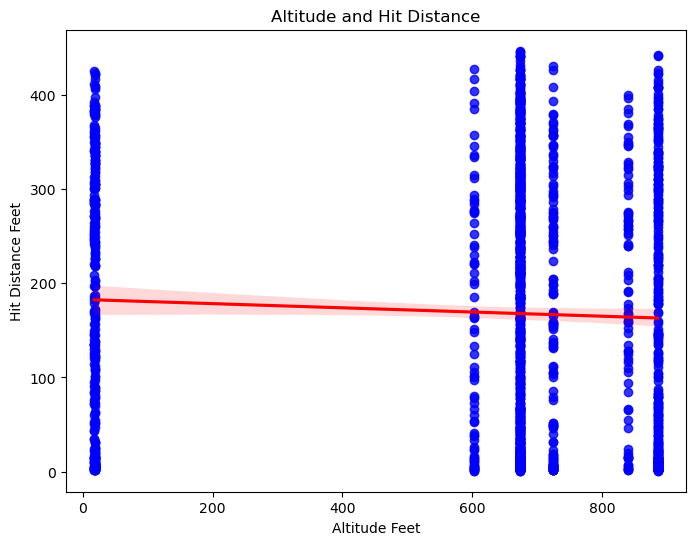

In [131]:
# Lets evaluate the affect of altitude on Santanas hit distance. 

# Import necessary packages. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
sns.regplot(x='Alt', y='hit_distance_sc', data=carlos_data, scatter_kws={'color': 'b'}, line_kws={'color': 'r'})

# Add labels and title
plt.title('Altitude and Hit Distance')
plt.xlabel('Altitude Feet')
plt.ylabel('Hit Distance Feet')

# Display the plot
plt.show()

In [127]:
# Lets now define this trend line and as a linear regression model to evaluate the effects of altitude on hit distance. 

# Import packages
import statsmodels.formula.api as smf

# build model
model = smf.ols('hit_distance_sc ~ Alt', data=carlos_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        hit_distance_sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.567
Date:                Sat, 10 Aug 2024   Prob (F-statistic):             0.0591
Time:                        11:35:37   Log-Likelihood:                -11679.
No. Observations:                1839   AIC:                         2.336e+04
Df Residuals:                    1837   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    182.8729      7.877     23.215      0.000     167.424     198.322
Alt           -0.0222      0.012     -1.889      0.059      -0.045       0.001
==============================================================================
Omnibus:                    25195.438   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.533
Skew:                           0.219   Prob(JB):                     8.39e-36
Kurtosis:                       1.616   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we see that increasing altitude actually has a negative effect on Santana's Performances. This phenomena actually goes against the common thought that the ball flies further at altitude. Although this model does not explain a lot of variance in the data (less than 99%) we do know that altitude is nearly a statistically significant predictor to the 95% confidence level and is significant at the 90% confidence level. Given this result I would suggest that if Santana were to maximize value he should seek to play for teams with stadiums at low elevation. 

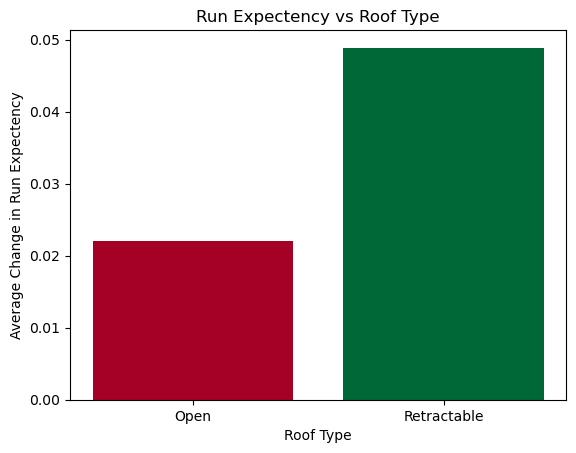

In [159]:
# Evaluate roof types effect on delta_run_exp. 

# Use Group by to calculate average estimated ba by weather. 
run_exp_by_roof = carlos_data.groupby('Roof type')['delta_run_exp'].mean()

# create normalized values for ba
normalized_values = (run_exp_by_roof - run_exp_by_roof.min()) / (run_exp_by_roof.max() - run_exp_by_roof.min())

# create the color scale for conditional formatting 
colors = plt.cm.RdYlGn(normalized_values)  # Use RdYlGn colormap

# Create plot
plt.bar(run_exp_by_roof.index, run_exp_by_roof.values, color= colors)

# Add labels and title
plt.xlabel('Roof Type')
plt.ylabel('Average Change in Run Expectency')
plt.title('Run Expectency vs Roof Type')

# Display the graph
plt.show()



In [163]:
# Perform a 2 sample T-test to test the difference in values here. 

# Import packages. 
from scipy import stats

# create open and retractable datasets
Open = carlos_data[carlos_data['Roof type']=='Open']
Retractable = carlos_data[carlos_data['Roof type']=='Retractable']

# Perform two-sample t-test on the difference of change in run expectancy. 
t_statistic, p_value = stats.ttest_ind(Open['delta_run_exp'], Retractable['delta_run_exp'])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -0.6194026323537268
P-value: 0.5357238803745824


Based on this result there is no statistically significant difference in Santana's hitting performance for balls in play based off the roof type. Although the bar chart above may suggest that Santana performs better under a retractable roof, Our results from the T-test prove there is no difference. 